# Лабораторная работа 8. Алгоритмы сортировки и поиска.

# 1. Алгоритмы сортировки.

In [1]:
ary = [0,3,5,1,2,3,5,4,2,34,43,24]

# 1.1. Сортировка выбором

Алгоритм:
- найти наименьший элемент в неотсортированной части массива;
- поставить его в начало;
- сдвинуть начало неотсортированной части. 

Сложность: $O(n^2)$.

Программа:

In [2]:
def selection_sort(arrayToSort):
    a = arrayToSort
    n = len(a)
    for i in range(n):
        idxMin = i
        for j in range(i+1, n):
            if a[j] < a[idxMin]:
                idxMin = j
                tmp = a[idxMin]
                a[idxMin] = a[i]
                a[i] = tmp
    return a

Тестовый запуск:

In [ ]:
print (selection_sort(ary.copy()))

[0, 2, 2, 1, 4, 3, 3, 5, 5, 24, 34, 43]


# 1.2. Сортировка вставками

Алгоритм:
- из неотсортированной части берется элемент;
- вставляется в отсортированную часть на своё мосто (в начале массива). 

Сложность: $O(n^2)$.

In [3]:
def insertion_sort(arrayToSort):
    a = arrayToSort.copy() 
    n = len(a)
    for i in range(n):
        v = a[i]
        j = i
        while (a[j-1] > v) and (j > 0):
            a[j] = a[j-1]
            j = j - 1
        a[j] = v
    return a

In [4]:
print (insertion_sort(ary))

[0, 1, 2, 2, 3, 3, 4, 5, 5, 24, 34, 43]


# 1.3. Сортировка методом пузырька

Алгоритм:
- последовательно сравниваются пары элементов идущих друг за другом;
- в случае несоответствия выбранному порядку меняются местами. 

Сложность: $O(n^2)$.

In [5]:
def bubble_sort(arrayToSort):
    a = arrayToSort.copy() 
    n = len(a)
    for i in range(n,0,-1):
        for j in range(1, i):
            if a[j-1] > a[j]:
                tmp = a[j-1]
                a[j-1] = a[j]
                a[j] = tmp
    return a

In [7]:
print (bubble_sort(ary))

[0, 1, 2, 2, 3, 3, 4, 5, 5, 24, 34, 43]


# 1.4. Сортировка слиянием

Алгоритм:
- сортируемый массив разбивается на две части примерно одинакового размера;
- каждая из получившихся частей сортируется отдельно, например — тем же самым алгоритмом;
- два упорядоченных массива половинного размера соединяются в один. 

Сложность: $O(n log_2 n)$.

In [6]:
def merge_sort(arrayToSort):
    if len(arrayToSort)>1:
        mid = len(arrayToSort)//2
        lefthalf = arrayToSort[:mid]
        righthalf = arrayToSort[mid:]
        
        merge_sort(lefthalf)
        merge_sort(righthalf)
        
        i, j, k = 0, 0, 0       
        while i<len(lefthalf) and j<len(righthalf):
            if lefthalf[i]<righthalf[j]:
                arrayToSort[k]=lefthalf[i]
                i=i+1
            else:
                arrayToSort[k]=righthalf[j]
                j=j+1
            k=k+1
        while i<len(lefthalf):
            arrayToSort[k]=lefthalf[i]
            i=i+1; k=k+1
        while j<len(righthalf):
            arrayToSort[k]=righthalf[j]
            j=j+1; k=k+1

In [8]:
alist = ary.copy() 
merge_sort(alist); 
print(alist)

[0, 1, 2, 2, 3, 3, 4, 5, 5, 24, 34, 43]


# 1.5. Быстрая сортировка

Алгоритм:
- выбрать (опорным) элемент из массива;
- перераспределить элементы в массиве так, что элементы меньше опорного помещаются перед ним, а больше или равные после;
- применить первые два шага к подмассивам слева и справа от опорных элементов, пока в подмассивах не останется не более одного элемента. 

Сложность: Средняя $O(n log_2 n)$, Худшая $O(n^2)$.

In [9]:
def quick_sort(a, l, r):
    if (r > l):
        v, i, j = a[r], l - 1, r

        while (True):
            i, j = i + 1, j - 1                            
            while(a[i] < v): i = i + 1
            while(a[j] > v): j = j - 1
            if (i >= j): break
            a[i], a[j] = a[j], a[i]
            
        a[i], a[r] = a[r], a[i]

        quick_sort(a, l, i - 1)
        quick_sort(a, i + 1, r)

In [10]:
alist = ary.copy() 
quick_sort(alist, 0, len(alist)-1)
print (ary)

[0, 3, 5, 1, 2, 3, 5, 4, 2, 34, 43, 24]


# Упражнение 1. Сортировка подсчётом.

Есть ли алгоритмы сортировки со сложностью, меньшей $O(n log_2 n)$?

Да, если известны свойства ключей. Например, если число возможных вариантов значений ограничено (и невелико) можно воспользоваться сортировкой подсчётом. 

Алгоритм:
- создать массив с числом эллементов равным количеству возможным вариантов ключа, заполнить его 0;
- перебрать (пройти) сортируемое множество подсчитывая количество ключей с конкретным значением (увеличивая на 1 значения соответствующего эллемента ранее созданного массива);
- записать подряд все ненулевые эллементы получившегося массива соответствующее его значению число раз.

Сложность: $O(n+k)$, где $k$ - число вариантов ключей.

Напишите программу (функцию) реализующую данный алгоритм.

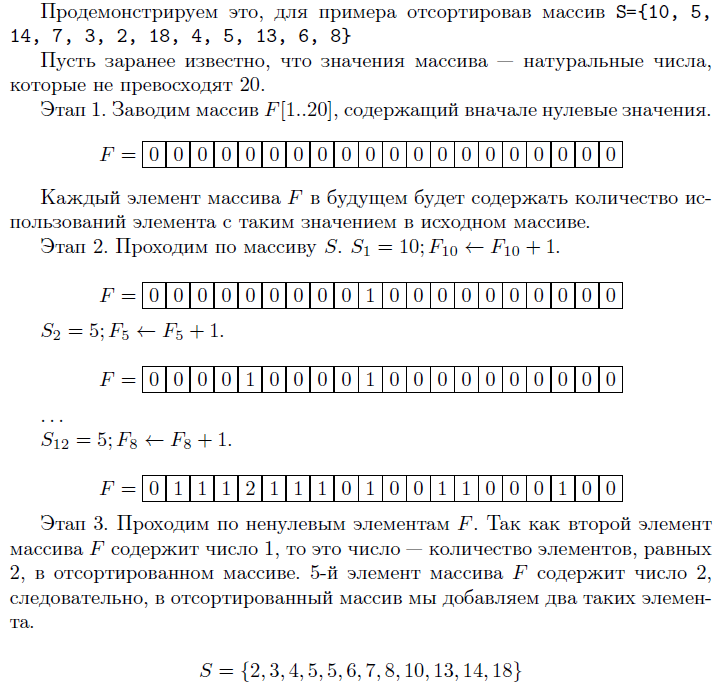

In [12]:
# Так можно добавлять картинки

from IPython.display import Image # вызов из библиотеки определённой функции
Image("Сортировка подсчётом.png")              # вызов функции и передача ей в качестве аргумента пути к файлу 

# (в данном случае фаил находится в той же папке)

In [14]:
import numpy as np

def counterSort(S):
    F = np.zeros(max(S) + 1)
    for si in S:
        F[si] += 1
    j = 0
    for i in range(len(F)):
        if F[i] != 0:
            for k in range(int(F[i])):
                S[j] = i
                j += 1
    return S

In [15]:
S = [10, 5, 14, 7, 3, 2, 18, 4, 5, 13, 6, 8]
print(counterSort(S))

[2, 3, 4, 5, 5, 6, 7, 8, 10, 13, 14, 18]


# Пример. Число $\pi$

In [19]:
from sympy import *
import numpy as np
import time
import pylab
import matplotlib.pyplot as plt

In [20]:
# Выведем заданное колличество знаков числа pi
npi=7;
print('Выведем %i знаков числа пи:\n' %npi, pi.n(npi));

Выведем 7 знаков числа пи:
 3.141593


Конвертируем дробную часть числа $\pi$ в список:

In [21]:
PI = [int(i) for i in str(pi.n(npi))[2:]]

Кроме того, можем считать цифры дробной части числа $\pi$ из файла (в котором храняться 10 000 000 его символов):

In [23]:
f = open("pi-10million.txt")  #  открываем файл
fs = f.readline(npi)          #  считываем из него npi символов
f.close()                     #  закроем файл

In [24]:
fs

'1415926'

In [25]:
Pi = [int(i) for i in fs]
print(Pi)

[1, 4, 1, 5, 9, 2, 6]


# Упражнение. Сортировка $\pi$

Сравните временную сложность всех рассмотренных алгоритмов сортировки на примере цифр числа $\pi$.

Воспользуйтесь для этого замером времени с помощью библиотеки tame. Пример:

In [26]:
start_time = time.time()
PI2 = insertion_sort(PI) 
Tame=time.time()-start_time
print ('Отсортированные цифры числа пи: \n\n', PI2)
print('\n Время потраченное на сортировку составило %15.7e секунд' %(Tame))

Отсортированные цифры числа пи: 

 [1, 1, 3, 4, 5, 9]

 Время потраченное на сортировку составило   1.0609627e-04 секунд


Запишем отсортированный список в файл:

In [27]:
f1 = open("pi_sort.txt", 'w')
f1.writelines('%i' % i for i in PI2)
f1.close()

Проверим что получилось:

In [28]:
f1 = open("pi_sort.txt", 'r')
fs = f1.readlines()          #  считываем всё содержимое файла
print(fs)
f1.close()

['113459']


Посмотрим как меняются затраты времени на сортировку вставками при увеличении числа сортируемых объектов:

In [31]:
ik = 11
Tame = np.zeros((3,ik))
NPI = [(i+1)*50 for i in range(ik)]
i=0
for npi in NPI:
    PI = [int(i) for i in str(pi.n(npi))[2:]]
    start_time = time.time()
    PI2 = insertion_sort(PI) 
    Tame[0, i]=time.time()-start_time
    
    start_time = time.time()
    PI2 = insertion_sort(PI) 
    Tame[1, i]=time.time()-start_time
    
    start_time = time.time()
    PI2 = insertion_sort(PI) 
    Tame[2, i]=time.time()-start_time
    i+=1

	 size	 Tame(sec)
	 50 	 2.048e-04
	 100 	 8.848e-04
	 150 	 8.898e-03
	 200 	 1.053e-02
	 250 	 5.045e-03
	 300 	 7.558e-03
	 350 	 1.023e-02
	 400 	 1.451e-02
	 450 	 3.682e-02
	 500 	 3.404e-02
	 550 	 3.205e-02
	 50 	 1.633e-04
	 100 	 8.638e-04
	 150 	 2.001e-03
	 200 	 4.024e-03
	 250 	 1.209e-02
	 300 	 7.704e-03
	 350 	 1.067e-02
	 400 	 3.376e-02
	 450 	 4.445e-02
	 500 	 2.566e-02
	 550 	 4.153e-02
	 50 	 2.310e-04
	 100 	 8.910e-04
	 150 	 1.853e-03
	 200 	 3.482e-03
	 250 	 5.215e-03
	 300 	 7.590e-03
	 350 	 1.050e-02
	 400 	 3.399e-02
	 450 	 3.755e-02
	 500 	 2.849e-02
	 550 	 6.596e-02


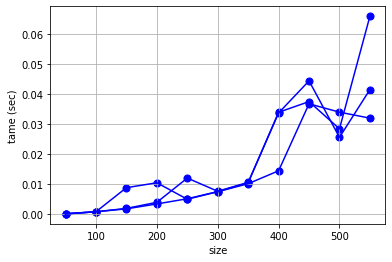

In [32]:
print('\t size\t Tame(sec)')
for i in range(0,ik):
    print ('\t %i \t %.3e' %(NPI[i], Tame[(0,i)]))
for i in range(0,ik):
    print ('\t %i \t %.3e' %(NPI[i], Tame[(1,i)]))
for i in range(0,ik):
    print ('\t %i \t %.3e' %(NPI[i], Tame[(2,i)]))

# график функции
pylab.figure ()
plt.plot(NPI, Tame[0], c='b')
plt.scatter(NPI, Tame[0], c='b',s=50)
plt.plot(NPI, Tame[1], c='b')
plt.scatter(NPI, Tame[1], c='b',s=50)
plt.plot(NPI, Tame[2], c='b')
plt.scatter(NPI, Tame[2], c='b',s=50)
# параметры графика
xl = plt.xlabel("size");
yl = plt.ylabel("tame (sec)");
plt.grid(True);
plt.show();

# Пример. Последовательный поиск

In [ ]:
def dummy_search (a, key):
    n = len(a)
    for i in range(n):
        if a[i] == key:
            return i
    return n

In [ ]:
ary = [7,8,1,2,3,4,13,5,1,2,44,5,1]
print(dummy_search (ary, 13))

6


In [ ]:
# вероятно чуть более рациональная реализация
def clever_search (a, key):
    n = len(a)
    i=0
    while a[i]!=key:
        i=i+1
    return i

In [ ]:
ary2 = [7,8,1,2,3,4,13,5,1,2,44,5,1,44]
print(clever_search (ary2, 13))

6


In [ ]:
%timeit dummy_search (ary, 44)
    
%timeit clever_search (ary2, 44)

The slowest run took 4.41 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 1.07 µs per loop
1000000 loops, best of 5: 994 ns per loop


# Упражнение. Поиск в $\pi$

Найдите в дробной части числа $\pi$ порядковый номер каждой цифры начиная с 1 встретившейся количество раз равное её значению (первую единицу, вторую двойку и т.д.)

In [ ]:
x=[int(i) for i in str(pi.n(npi))[2:]]
x[:5]

[1, 4, 1, 5, 9]

In [ ]:
npi = 100
PI = [int(i) for i in str(pi.n(npi))[2:]]

a = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
k = a.copy()

for i in range(npi - 2):
    a[PI[i]] += 1
    if PI[i] == a[PI[i]]:
        k[PI[i]] = i + 1

print(k[1:])

[1, 16, 17, 36, 48, 72, 96, 74, 55]


# Домашнее задание (базовое):

# Задание 1.

Найдите в числе $\pi$ номер цифры в дробной части после которой идёт последовательность из:

- шести 9;
- шесть 8;
- шесть 0;
- первых шести цифр;
- семь цифр вашего номера телефона.

In [ ]:
phone = "3240236" # 7-и значный номер телефона
constants = ["999999", "888888", "000000", "123456", phone]
 
const_max_len = max([len(constant) for constant in constants])
constants_pos = [-1]*len(constants)
 
size = 65536 #по сколько байт считывать за раз
 
pos = 0
old = ''
with open("pi.txt") as f:
    null = f.read(1)
    while True:
        data = old + f.read(size)
        if data == old: break
 
        for i in range(len(constants)):
            if constants_pos[i] == -1:
                j = data.find(constants[i])
                if j != -1: constants_pos[i] = j + pos
 
        pos = pos + len(data) - const_max_len
        old = data[-const_max_len:]
 
for (a, b) in zip(constants, constants_pos):
    print(f'{a} встречается на позиции {b}')

999999 встречается на позиции 771
888888 встречается на позиции 225149
000000 встречается на позиции 2358639
123456 встречается на позиции 2490409
3240236 встречается на позиции 2273642


# Задание 2. Поиск в отсортированном массиве

Реализуйте алгоритмы сужения области:

- бинарный поиск (https://ru.wikipedia.org/wiki/%D0%94%D0%B2%D0%BE%D0%B8%D1%87%D0%BD%D1%8B%D0%B9_%D0%BF%D0%BE%D0%B8%D1%81%D0%BA)
- метод золотого сечения (https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B7%D0%BE%D0%BB%D0%BE%D1%82%D0%BE%D0%B3%D0%BE_%D1%81%D0%B5%D1%87%D0%B5%D0%BD%D0%B8%D1%8F)
- интерполирующий поиск (https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%BF%D0%BE%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%BF%D0%BE%D0%B8%D1%81%D0%BA)

(см. лекцию 3 с. 17)

In [ ]:
def binary(S, key):
    l = 0
    r = len(S) - 1
    while r - l > 1:
        m = (r + l) // 2
        if key > S[m]:
            l = m
        elif key < S[m]:
            r = m
        else:
            print('binarySearch:', m)
            return
            # важное пояснение: бинарный поиск не обязан искать первое вхождение, 
            # потому что он с самого начала сравнивает с серединой
    if S[l] == key:
        print('binarySearch:', l)
    elif S[r] == key:
        print('binarySearch:', r)
    else:
        print('binarySearch: not found')

In [ ]:
def golden(S, key):
    phi = 0.5*(1 + 5 ** 0.5)
    a = 0
    b = len(S) - 1
    while b - a >= 1:
        x1 = int(b - (b - a)//phi)
        x2 = int(a + (b - a)//phi)
        A = S[a : x2 + 1]
        B = S[x1 : b + 1]
        if key in A:
            b = x2
        elif key in B:
            a = x1
        else:
            print('goldenCutSearch: not found')
            return
    print('goldenCutSearch:', a)

In [ ]:
def interpolat(S, key):
    l = 0
    r = len(S) - 1
    while S[l] < key < S[r]:
        m = int(l + ((key - S[l]) * (r - l)) / (S[r] - S[l]))
        if key > S[m]:
            l = m + 1
        elif key < S[m]:
            r = m - 1
        else:
            print('interpolationSearch:', m)
            return
    if S[l] == key:
        print('interpolationSearch:', l)
    elif S[r] == key:
        print('interpolationSearch:', r)
    else:
        print('interpolationSearch: not found')

In [ ]:
S = [int(i) for i in str(pi.n(10))[2:]]

print(S)
print(binary(S, 5))
print(golden(S, 5))
print(interpolat(S, 4))

[1, 4, 1, 5, 9, 2, 6, 5, 4]
binarySearch: 3
None
goldenCutSearch: 3
None
interpolationSearch: 8
None


In [ ]:
try:
    key = float(input('Введите значение ключа: '))
except ValueError:
    print('Вы ввели не число.')

A = list(map(float, input('Введите элементы массива через пробел: ').split()))

A.sort()
print('Отсортированный массив:', A, '\n')

print('Поиск:')
binary(A, key)
golden(A, key)
interpolat(A, key)

Введите значение ключа: 2
Введите элементы массива через пробел: 1 2 3 9 8 7 6
Отсортированный массив: [1.0, 2.0, 3.0, 6.0, 7.0, 8.0, 9.0] 

Поиск:
binarySearch: 1
goldenCutSearch: 1
interpolationSearch: 1


# Задание 3.

Сравните производительность алгоритмов из задания 2 на задании 1.

In [ ]:
npi = 1000
PI = [int(i) for i in str(pi.n(npi))[2:]]


D = {}
i = 0
for PI_i in PI:
    D[i] = PI_i
    i += 1


PI = list(D.values())


def dictionarySort(D):
    LOI = [] # list of indexes
    LOI = list(D.keys())
    
    # bubble sort method
    a = list(D.values())
    n = len(a)
    for i in range(n, 0, -1):
        for j in range(1, i):
            if a[j - 1] > a[j]:
                a[j - 1], a[j] = a[j], a[j - 1]
                LOI[j - 1], LOI[j] = LOI[j], LOI[j - 1]

    return LOI


LOI = dictionarySort(D)
print(LOI)

[31, 49, 53, 64, 70, 76, 84, 96, 105, 115, 120, 127, 131, 145, 158, 163, 166, 175, 194, 206, 244, 247, 263, 269, 286, 290, 306, 307, 310, 326, 329, 339, 356, 359, 360, 365, 368, 374, 397, 402, 407, 420, 442, 450, 492, 512, 519, 522, 542, 544, 551, 556, 560, 595, 600, 601, 602, 617, 637, 656, 658, 668, 681, 683, 702, 714, 719, 723, 745, 749, 754, 774, 780, 792, 801, 814, 817, 826, 837, 852, 854, 855, 856, 877, 884, 898, 908, 956, 967, 972, 973, 988, 995, 0, 2, 36, 39, 48, 67, 93, 94, 102, 109, 137, 147, 152, 153, 154, 162, 167, 173, 174, 197, 205, 219, 237, 242, 245, 249, 268, 280, 294, 296, 313, 318, 323, 341, 343, 361, 362, 380, 384, 389, 392, 394, 395, 416, 423, 426, 427, 431, 436, 437, 441, 444, 445, 470, 482, 489, 493, 494, 498, 524, 540, 546, 565, 567, 573, 586, 597, 606, 609, 626, 639, 645, 650, 659, 669, 680, 703, 708, 709, 711, 716, 727, 729, 733, 743, 751, 757, 758, 779, 785, 790, 796, 842, 845, 846, 849, 851, 853, 858, 881, 886, 888, 894, 920, 921, 944, 950, 960, 962, 970, 97

In [ ]:
def searchForOrderedSubsequences(S, length):
    subs = []
    for i in range(len(S) - length + 1):
        for k in range(1, length):
            if S[i + k] + 1 != S[i + k + 1]:
                break
            if k == length - 1:
                subs.append(i)
    return subs


OSs = searchForOrderedSubsequences(LOI, 6)
for OS in OSs:
    print(LOI[OS + 1 : OS + 7])

[761, 762, 763, 764, 765, 766]


In [ ]:
def sixNinesSearch(PI, D, OSs):
    PI.sort()
    for OS in OSs:
        if PI[OS + 1 : OS + 7] == [9, 9, 9, 9, 9, 9]:
            print('sixNinesSearch: found, index in original Pi number is', LOI[OS + 1] - 1)


sixNinesSearch(PI, D, OSs)

sixNinesSearch: found, index in original Pi number is 760


In [ ]:
def modifiedBinarySearch(PI, LOI, keySequence):
    l = 0
    r = len(LOI) - 1 - len(keySequence)
    PI.sort()
    while r - l > 1:
        m = (r + l) // 2
        if keySequence > PI[m + 1 : m + len(keySequence) + 1]:
            l = m
        elif keySequence < PI[m + 1 : m + len(keySequence) + 1]:
            r = m
        else:
            for k in range(1, len(keySequence)):
                if not LOI[m + k] + 1 == LOI[m + k + 1]:
                    l += 1
                    k = False
                    break
            if not k:
                continue
            print('modifiedBinarySearch:', LOI[m + 1] - 1)
            return
    print('modifiedBinarySearch: not found')


modifiedBinarySearch(PI, LOI, [9, 9, 9, 9, 9, 9])

modifiedBinarySearch: 760


# Домашнее задание (дополнительное):

# Задание "Пирамидальная сортировка"

Напишите программу (функцию) реализующую алгоритм пирамидальной сортировки (https://ru.wikipedia.org/wiki/%D0%9F%D0%B8%D1%80%D0%B0%D0%BC%D0%B8%D0%B4%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%81%D0%BE%D1%80%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0,
https://habr.com/ru/post/221095/,
Алгоритмы. Справочник с примерами на C, C , Java и Python (Хайнеман Дж., и др - 2017) с. 87).

In [ ]:
def heapSort(v):
    N = len(v)
    for j in range(N):
        for i in range(N // 2 - j // 2 - 1, -1, -1):
            if 2 * i + 2 <= N - 1 - j:
                if v[2 * i + 1] > v[2 * i + 2]:
                    if v[i] < v[2 * i + 1]:
                        v[i], v[2 * i + 1] = v[2 * i + 1], v[i]
                else:
                    if (v[i] < v[2 * i + 2]):
                        v[i], v[2 * i + 2] = v[2 * i + 2], v[i]
            else:
                if (2 * i + 1 <= N - 1 - j):
                    if (v[i] < v[2 * i + 1]):
                        v[i], v[2 * i + 1] = v[2 * i + 1], v[i]
        v[0], v[N - 1 - j] = v[N - 1 - j], v[0]
    for i in range(N):
        yield v[i]



array = list(map(int, input('Введите элементы массива через пробел: ').split()))
sorted = [ str(i) for i in heapSort(array) ]
print('Отсортированный массив: ' + ' '.join(sorted))

Введите элементы массива через пробел: 1 2 2 4 9 8 7
Отсортированный массив: 1 2 2 4 7 8 9


In [ ]:
def heapify(arr, n, i):
    largest = i # Initialize largest as root
    l = 2 * i + 1   # left = 2*i + 1
    r = 2 * i + 2   # right = 2*i + 2
    if l < n and arr[i] < arr[l]:
        largest = l
    if r < n and arr[largest] < arr[r]:
        largest = r
    if largest != i:
        arr[i],arr[largest] = arr[largest],arr[i] # свап
        heapify(arr, n, largest)

def heapSort(arr):
    n = len(arr)
    for i in range(n, -1, -1):
        heapify(arr, n, i)
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i] # свап 
        heapify(arr, i, 0)


arr = [12, 11, 13, 5, 6, 7]
print(arr)

heapSort(arr)


arr

[12, 11, 13, 5, 6, 7]


[5, 6, 7, 11, 12, 13]

# Задание "Малые тела"

Есть база данных малых тел солнечной системы созданная под эгидой Международного астрономического союза. Файл с этой базой можно скачать здесь https://www.minorplanetcenter.net/iau/MPCORB/MPCORB.DAT, а здесь приведено его описание https://www.minorplanetcenter.net/iau/info/MPOrbitFormat.html

Отсортируйте эту базу по названию малого тела. Напишите две программы реализующие поиск в отсортированном и неотсартированном массивах. В последнем случае поиск может производиться по любому параметру из таблицы.

In [ ]:
def sortByTitle(arr):
    return arr[2][23] # сортируем по строке

In [ ]:

filename = 'MPCORB.DAT'

data = [] 

with open(filename, 'r') as f:
    k = False
    i = 0
    for line in f:
        if '--------' in line:
            k = True
            continue
        if k:
            s = []
            s.append(line[0 : 7])
            s.append(line[8 : 13])
            s.append(float(line[14 : 19]))
            s.append(line[20 : 25])
            s.append(float(line[26 : 35]))
            s.append(float(line[37 : 46]))
            s.append(float(line[48 : 57]))
            s.append(float(line[59 : 68]))
            s.append(float(line[70 : 79]))
            s.append(float(line[80 : 91]))
            s.append(float(line[92 : 103]))
            s.append(line[105])
            s.append(line[107 : 116])
            s.append(int(line[117 : 122]))
            s.append(int(line[123 : 126]))
            s.append(int(line[127 : 131]))
            s.append(line[131])
            #s.append(int(line[132 : 136]))
            s.append(line[137 : 141])
            s.append(line[142 : 145])
            s.append(line[146 : 149])
            s.append(line[150 : 160])
            s.append(line[161 : 165])
            s.append(line[166 : 194]) # тот самый кусок строки с названием объекта
            s.append(line[194 : 202])
            data.append([i, line, s])
            i += 1
    print('Прочитано и записано строк: %i' % i)

#sorted_data = sorted(data, key=sortByTitle)
print('Сортировка завершена.')


Прочитано и записано строк: 108462
Сортировка завершена.


In [ ]:
data

[[0,
  '00001    3.31  0.15 K221L 291.37562   73.63703   80.26858   10.58769  0.0785010  0.21424745   2.7660431  0 MPO681823  7301 122 1801-2022 0.65 M-v 30k Pan        0000      (1) Ceres              20220126\n',
  ['00001  ',
   ' 3.31',
   0.15,
   'K221L',
   291.37562,
   73.63703,
   80.26858,
   10.58769,
   0.078501,
   0.21424745,
   2.7660431,
   '0',
   'MPO681823',
   7301,
   122,
   1801,
   '-',
   '0.65',
   'M-v',
   '30k',
   'Pan       ',
   '0000',
   '     (1) Ceres              ',
   '20220126']],
 [1,
  '00002    4.11  0.15 K221L 272.47992  310.69724  172.91658   34.92531  0.2299930  0.21366046   2.7711069  0 MPO681823  8875 119 1804-2022 0.58 M-c 28k Pan        0000      (2) Pallas             20220105\n',
  ['00002  ',
   ' 4.11',
   0.15,
   'K221L',
   272.47992,
   310.69724,
   172.91658,
   34.92531,
   0.229993,
   0.21366046,
   2.7711069,
   '0',
   'MPO681823',
   8875,
   119,
   1804,
   '-',
   '0.58',
   'M-c',
   '28k',
   'Pan       ',
   '0000'

In [ ]:
print('Прочитано и записано строк: %i' % i)



sorted_data = sorted(data, key=sortByTitle)
print('Сортировка завершена.')

Прочитано и записано строк: 108462
Сортировка завершена.


In [ ]:
sorted_data

[[108461,
  'A8462   16.53  0.15 K221L 211.30243   20.08323  240.10221    6.18399  0.2122464  0.26922981   2.3753117  0 MPO682978   533  16 2001-2022 0.75 M-v 3Ek Pan        000',
  ['A8462  ',
   '16.53',
   0.15,
   'K221L',
   211.30243,
   20.08323,
   240.10221,
   6.18399,
   0.2122464,
   0.26922981,
   2.3753117,
   '0',
   'MPO682978',
   533,
   16,
   2001,
   '-',
   '0.75',
   'M-v',
   '3Ek',
   'Pan       ',
   '000',
   '',
   '']],
 [5334,
  '05335   13.3   0.15 K221L 275.56408  191.16732  314.01702   61.60636  0.8658032  0.02413566  11.8585050  2 MPO 87240    47   2 1991-1992 0.65 M-v 38h MPCW       4005   (5335) Damocles           19920822\n',
  ['05335  ',
   '13.3 ',
   0.15,
   'K221L',
   275.56408,
   191.16732,
   314.01702,
   61.60636,
   0.8658032,
   0.02413566,
   11.858505,
   '2',
   'MPO 87240',
   47,
   2,
   1991,
   '-',
   '0.65',
   'M-v',
   '38h',
   'MPCW      ',
   '4005',
   '  (5335) Damocles           ',
   '19920822']],
 [5589,
  '05590   

In [ ]:
# поиск в несортированном массиве по имени малого тела
search_str = input('Введите строку поиска: ')
for i in range(len(data)):
    if search_str in data[i][2][23]:
        print('Совпадение в элементе %i несортированного массива. ' % i +
              'Планета - %s' % str(data[i][2][23]))
        print(data[i][1])

Введите строку поиска: Hooveria


In [ ]:
print(data[931][2][1], type(data[931][2][1]))

10.11 <class 'str'>


In [ ]:
# поиск в отсортированном массиве по любому из 25 свойств,
# запись всех свойств в доп. массив
j = int(input('Введите один из 25 индексов данных (целое число от 1 до 25) ' +
              '(подробнее: https://www.minorplanetcenter.net/iau/info/' + 
              'MPOrbitFormat.html): ')) - 1
search_str = input('Введите строку поиска: ')
selection = []
for i in range(len(sorted_data)):
    if type(sorted_data[i][2][j]) == type(str):
        if search_str in sorted_data[i][2][j]:
            print('Совпадение в элементе %i несортированного массива. ' % i +
                  'Значение - %s' % str(sorted_data[i][2][j]))
            print(sorted_data[i][1])
            selection.append(sorted_data[i])
    else:
        search_str = float(search_str)
        if search_str == sorted_data[i][2][j]:
            print('Совпадение в элементе %i несортированного массива. ' % i +
                  'Значение - %f' % float(sorted_data[i][2][j]))
            print(sorted_data[i][1])
            selection.append(sorted_data[i])

Введите один из 25 индексов данных (целое число от 1 до 25) (подробнее: https://www.minorplanetcenter.net/iau/info/MPOrbitFormat.html): 14
Введите строку поиска: 2625
Совпадение в элементе 29416 несортированного массива. Значение - 2625.000000
07920   13.18  0.15 K221L 215.31890  173.44052  258.09751   10.80057  0.1079311  0.23527888   2.5986478  0 MPO647105  2625  22 1951-2021 0.42 M-v 3Ek Pan        0000   (7920) 1981 XM2           20210825

Совпадение в элементе 34143 несортированного массива. Значение - 2625.000000
03694   10.63  0.15 K221L 271.68324   80.24532  311.08154    4.97788  0.2057333  0.12653075   3.9295123  0 MPO660785  2625  28 1960-2021 0.56 M-v 3Ek Pan        0008   (3694) Sharon             20210926

Совпадение в элементе 42847 несортированного массива. Значение - 2625.000000
06231   13.77  0.15 K221L 144.80814   34.15431  162.72947    9.42144  0.1420130  0.25306234   2.4754322  0 MPO660785  2625  24 1985-2021 0.60 M-v 3Ek Pan        0000   (6231) Hundertwasser      